In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ocr-video-dataset/test_video.mp4


In [2]:
import cv2
import easyocr
import time

reader = easyocr.Reader(['en'], gpu=False)
video_path = "/kaggle/input/ocr-video-dataset/test_video.mp4"
cap = cv2.VideoCapture(video_path)

frame_count = 0
start_time = time.time()
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    result = reader.readtext(frame)
    frame_count += 1

cap.release()
end_time = time.time()
cpu_execution_time = end_time - start_time
cpu_fps = frame_count / cpu_execution_time
print(f"Execution time: {cpu_execution_time:.2f} seconds")
print(f"FPS: {cpu_fps:.2f}")

Execution time: 296.41 seconds
FPS: 0.29


In [3]:
import cv2
import easyocr
import time

reader = easyocr.Reader(['en'], gpu=True)
video_path = "/kaggle/input/ocr-video-dataset/test_video.mp4"
cap = cv2.VideoCapture(video_path)

frame_count = 0
start_time = time.time()

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    result = reader.readtext(frame)
    frame_count += 1

cap.release()
end_time = time.time()

gpu_execution_time = end_time - start_time
gpu_fps = frame_count / gpu_execution_time
print(f"Execution time: {gpu_execution_time:.2f} seconds")
print(f"FPS: {gpu_fps:.2f}")


/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/parallel_apply.py:79: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.device(device), torch.cuda.stream(stream), autocast(enabled=autocast_enabled):


Execution time: 31.85 seconds
FPS: 2.73


In [4]:
import cv2
import easyocr
import numpy as np
import time
reader = easyocr.Reader(['en'], gpu=False)


video_path = "/kaggle/input/ocr-video-dataset/test_video.mp4"
cap = cv2.VideoCapture(video_path)


frame_rate = 10  
frame_count = 0
start_time = time.time()

previous_frame = None
previous_result = None
similarity_threshold = 0.95 

def preprocess_frame(frame):
    
    resized_frame = cv2.resize(frame, (640, 480)) 
    gray_frame = cv2.cvtColor(resized_frame, cv2.COLOR_BGR2GRAY)  
    _, binary_frame = cv2.threshold(gray_frame, 128, 255, cv2.THRESH_BINARY) 
    return binary_frame

def is_similar(frame1, frame2):
    
    if frame1 is None or frame2 is None:
        return False
    difference = cv2.absdiff(frame1, frame2)
    non_zero_count = np.count_nonzero(difference)
    total_pixels = frame1.size
    similarity = 1 - (non_zero_count / total_pixels)
    return similarity > similarity_threshold

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    if frame_count % frame_rate == 0:
        preprocessed_frame = preprocess_frame(frame)
        
        if not is_similar(preprocessed_frame, previous_frame):
            result = reader.readtext(preprocessed_frame)
            previous_result = result  
        else:
            result = previous_result  

        previous_frame = preprocessed_frame

    frame_count += 1

cap.release()
end_time = time.time()
optimized_cpu_execution_time = end_time - start_time
optimized_cpu_fps = frame_count / optimized_cpu_execution_time
print(f"Execution time: {optimized_cpu_execution_time:.2f} seconds")
print(f"FPS: {optimized_cpu_fps:.2f}")


Execution time: 20.20 seconds
FPS: 4.31


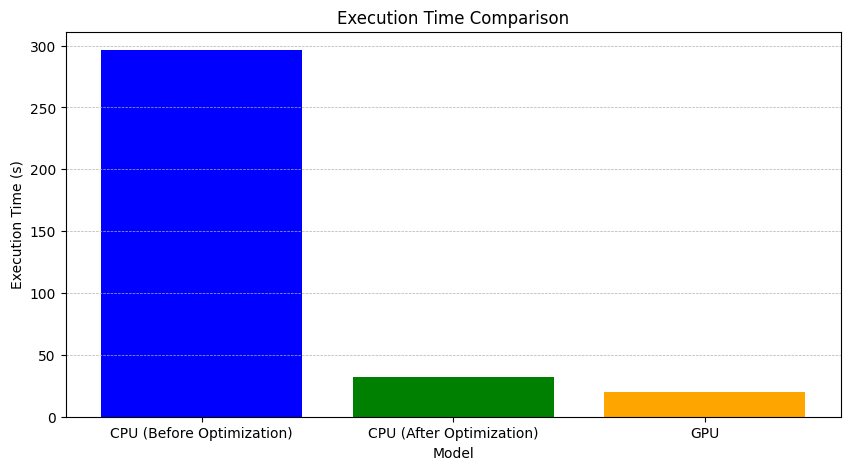

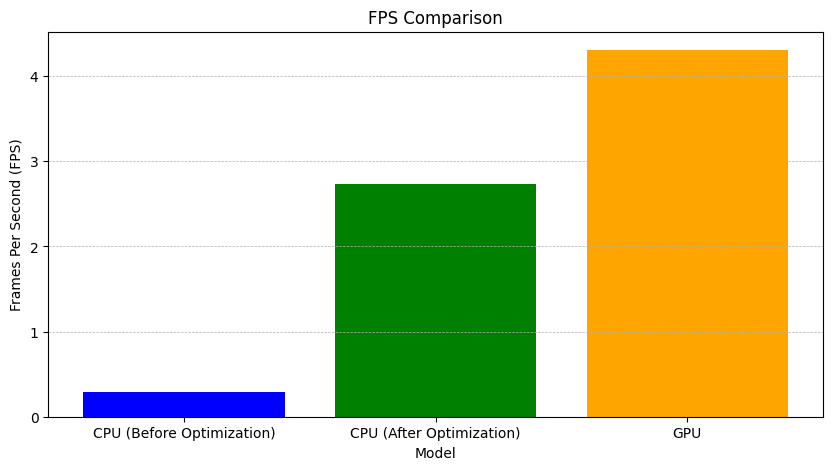

In [5]:
import matplotlib.pyplot as plt
results = {
    "Model": ["CPU (Before Optimization)", "CPU (After Optimization)", "GPU"],
    "Execution Time (s)": [cpu_execution_time, gpu_execution_time, optimized_cpu_execution_time],
    "FPS": [cpu_fps, gpu_fps, optimized_cpu_fps]
}

# Visualization of Execution Time
plt.figure(figsize=(10, 5))
plt.bar(results["Model"], results["Execution Time (s)"], color=['blue', 'green', 'orange'])
plt.title("Execution Time Comparison")
plt.ylabel("Execution Time (s)")
plt.xlabel("Model")
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.show()

# Visualization of FPS
plt.figure(figsize=(10, 5))
plt.bar(results["Model"], results["FPS"], color=['blue', 'green', 'orange'])
plt.title("FPS Comparison")
plt.ylabel("Frames Per Second (FPS)")
plt.xlabel("Model")
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.show()
